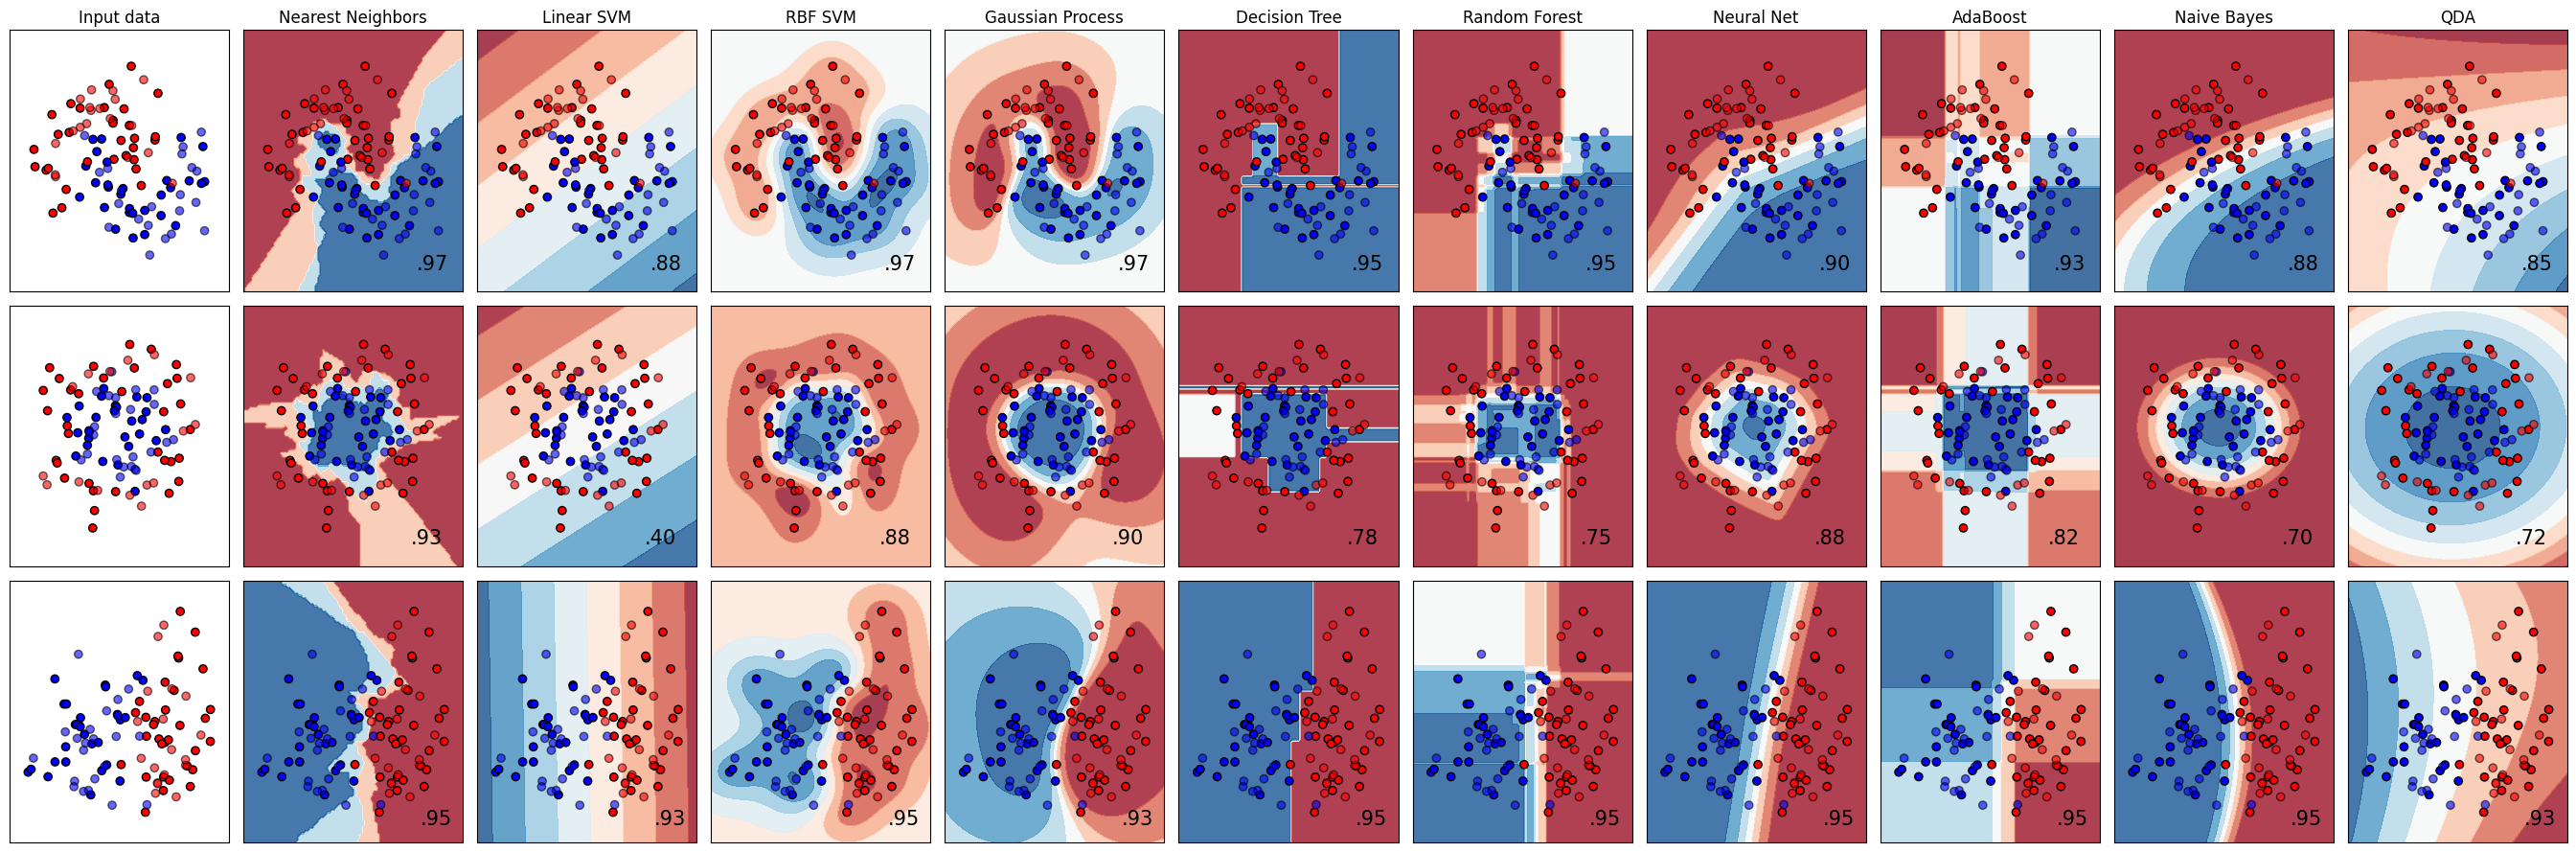

In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [2]:
# prompt: A simple machine learning example using NB

import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data (replace with your actual data)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6,7], [7,8], [8,9], [9,10], [10,11]]) # Features
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # Labels (0 or 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

# Create and train a Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [4]:
# Try to write a simple code using Iris dataset, applying KNN classifier, Complete the empty blocks below
# References in https://vinodsblog.com/2018/11/08/classification-and-regression-demystified-in-machine-learning/

#importing necessary libraries
# hint: sklearn datasets, model selections, neighbors and metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
# hint: load the dataset and assign them to data and label variables
data = datasets.load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
# hint: sklearn train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a K-Nearest Neighbors classifier
# sklearn KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
# sklearn accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [5]:
# prompt: min-max normalization examples

# Min-Max Normalization Example
# The formula for min-max normalization is:
# x_normalized = (x - x_min) / (x_max - x_min)

# Sample data
data = [1, 5, 10, 15, 20]

# Find the minimum and maximum values
x_min = min(data)
x_max = max(data)

# Perform min-max normalization
normalized_data = [(x - x_min) / (x_max - x_min) for x in data]

# Print the normalized data
print("Original Data:", data)
print("Normalized Data:", normalized_data)

# Example using NumPy
import numpy as np

data_np = np.array(data)
normalized_data_np = (data_np - np.min(data_np)) / (np.max(data_np) - np.min(data_np))
print("Normalized Data (NumPy):", normalized_data_np)


Original Data: [1, 5, 10, 15, 20]
Normalized Data: [0.0, 0.21052631578947367, 0.47368421052631576, 0.7368421052631579, 1.0]
Normalized Data (NumPy): [0.         0.21052632 0.47368421 0.73684211 1.        ]


In [6]:
# prompt: Z score normalization example

import numpy as np
# Z-Score Normalization Example
# The formula for Z-score normalization is:
# z = (x - μ) / σ
# where:
# x is the original value
# μ is the mean of the data
# σ is the standard deviation of the data

# Sample data
data = [1, 5, 10, 15, 20]

# Calculate the mean and standard deviation
mean = np.mean(data)
std = np.std(data)

# Perform Z-score normalization
normalized_data = [(x - mean) / std for x in data]

# Print the normalized data
print("Original Data:", data)
print("Normalized Data:", normalized_data)

# Example using NumPy

data_np = np.array(data)
normalized_data_np = (data_np - np.mean(data_np)) / np.std(data_np)
print("Normalized Data (NumPy):", normalized_data_np)


Original Data: [1, 5, 10, 15, 20]
Normalized Data: [-1.3541130616417665, -0.7653682522323028, -0.02943724047047308, 0.7064937712913566, 1.4424247830531862]
Normalized Data (NumPy): [-1.35411306 -0.76536825 -0.02943724  0.70649377  1.44242478]


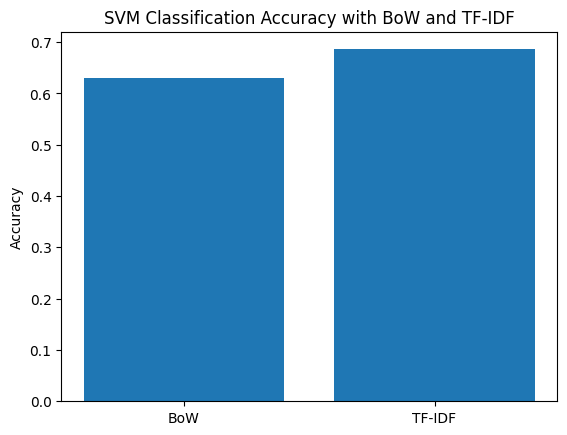

Accuracy with BoW: 0.6298245614035087
Accuracy with TF-IDF: 0.6859649122807018


In [7]:
# Try yourself later:
# prompt: A simple example with TF-IDF compared with BoW, visualize the outcome, use a proper dataset, use SVM

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

# Load a subset of the 20 Newsgroups dataset
categories = ['alt.atheism', 'talk.religion.misc']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

# Bag-of-Words (BoW) representation
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(newsgroups_train.data)
X_test_bow = vectorizer_bow.transform(newsgroups_test.data)

# TF-IDF representation
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)
X_test_tfidf = vectorizer_tfidf.transform(newsgroups_test.data)

# Train SVM classifier with BoW
svm_bow = SVC(kernel='linear')
svm_bow.fit(X_train_bow, newsgroups_train.target)
y_pred_bow = svm_bow.predict(X_test_bow)
accuracy_bow = accuracy_score(newsgroups_test.target, y_pred_bow)

# Train SVM classifier with TF-IDF
svm_tfidf = SVC(kernel='linear')
svm_tfidf.fit(X_train_tfidf, newsgroups_train.target)
y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(newsgroups_test.target, y_pred_tfidf)

# Visualize the results
labels = ['BoW', 'TF-IDF']
accuracies = [accuracy_bow, accuracy_tfidf]
plt.bar(labels, accuracies)
plt.ylabel('Accuracy')
plt.title('SVM Classification Accuracy with BoW and TF-IDF')
plt.show()

print(f"Accuracy with BoW: {accuracy_bow}")
print(f"Accuracy with TF-IDF: {accuracy_tfidf}")
